# Inhaltsverzeichnis

| Abschnitt | Unterabschnitt |
|-----------|----------------|
| **[Residuenanalyse mit STL-Zerlegung](#residuenanalyse-mit-stl-zerlegung)** | [Residuenanalyse für tägliche Daten](#residuenanalyse-fuer-taegliche-daten), [Ausgabedateien](#ausgabedateien), [Zusammenfassung](#zusammenfassung) |


# Residuenanalyse mit STL-Zerlegung

Diese Analyse untersucht die **Residuen** aus der **STL-Zerlegung** der täglichen und monatlichen Brandhäufigkeiten. Die Residuen stellen den Teil der Daten dar, der nicht durch den Trend oder die Saisonalität erklärt werden kann. Eine gründliche Residuenanalyse stellt sicher, dass die Zerlegung die wesentlichen Muster der Daten effektiv erfasst hat.

---

## Residuenanalyse für tägliche Daten

1. **Histogramm der Residuen**:
   - Zeigt die Verteilung der Residuen.
   - Hilft zu erkennen, ob die Residuen einer Normalverteilung folgen oder Abweichungen wie Schiefe oder Kurtosis aufweisen.

2. **ACF-Plot (Autokorrelationsfunktion)**:
   - Das **blaue Intervall** repräsentiert das **95%-Konfidenzintervall**:
     - ACF-Werte außerhalb dieses Intervalls deuten auf statistisch signifikante Autokorrelationen bei den jeweiligen Lags hin.
     - Werte innerhalb des Intervalls legen nahe, dass die Residuen wie weißes Rauschen (zufällig und unkorreliert) sind.

3. **Wichtige Erkenntnisse**:
   - Idealerweise sollten die Residuen zufällig und unkorreliert erscheinen.
   - Bei signifikanter Autokorrelation könnten in der Modellierung wichtige Strukturen fehlen.

---

## Ausgabedateien

Die folgenden Diagramme wurden im Ordner **Abbildungen** gespeichert:
- `daily_residual_analysis.png`: Residuenanalyse für tägliche Brandhäufigkeiten.
- `monthly_residual_analysis.png`: Residuenanalyse für monatliche Brandhäufigkeiten.

---

## Zusammenfassung

Die Residuenanalyse ist wichtig für:
- Die Überprüfung der Wirksamkeit der Zerlegung (Entfernung von Trend und Saisonalität).
- Die Vorbereitung der Daten für weitere Modellierungen, wie z. B. Vorhersagen.
- Die Diagnose potenzieller Probleme, wie z. B. fehlender Muster oder Autokorrelation.

Die Residuenplots (Zeitreihe, Histogramm und ACF) geben Einblicke, ob die STL-Zerlegung die zugrunde liegenden Muster der Daten angemessen erfasst hat.


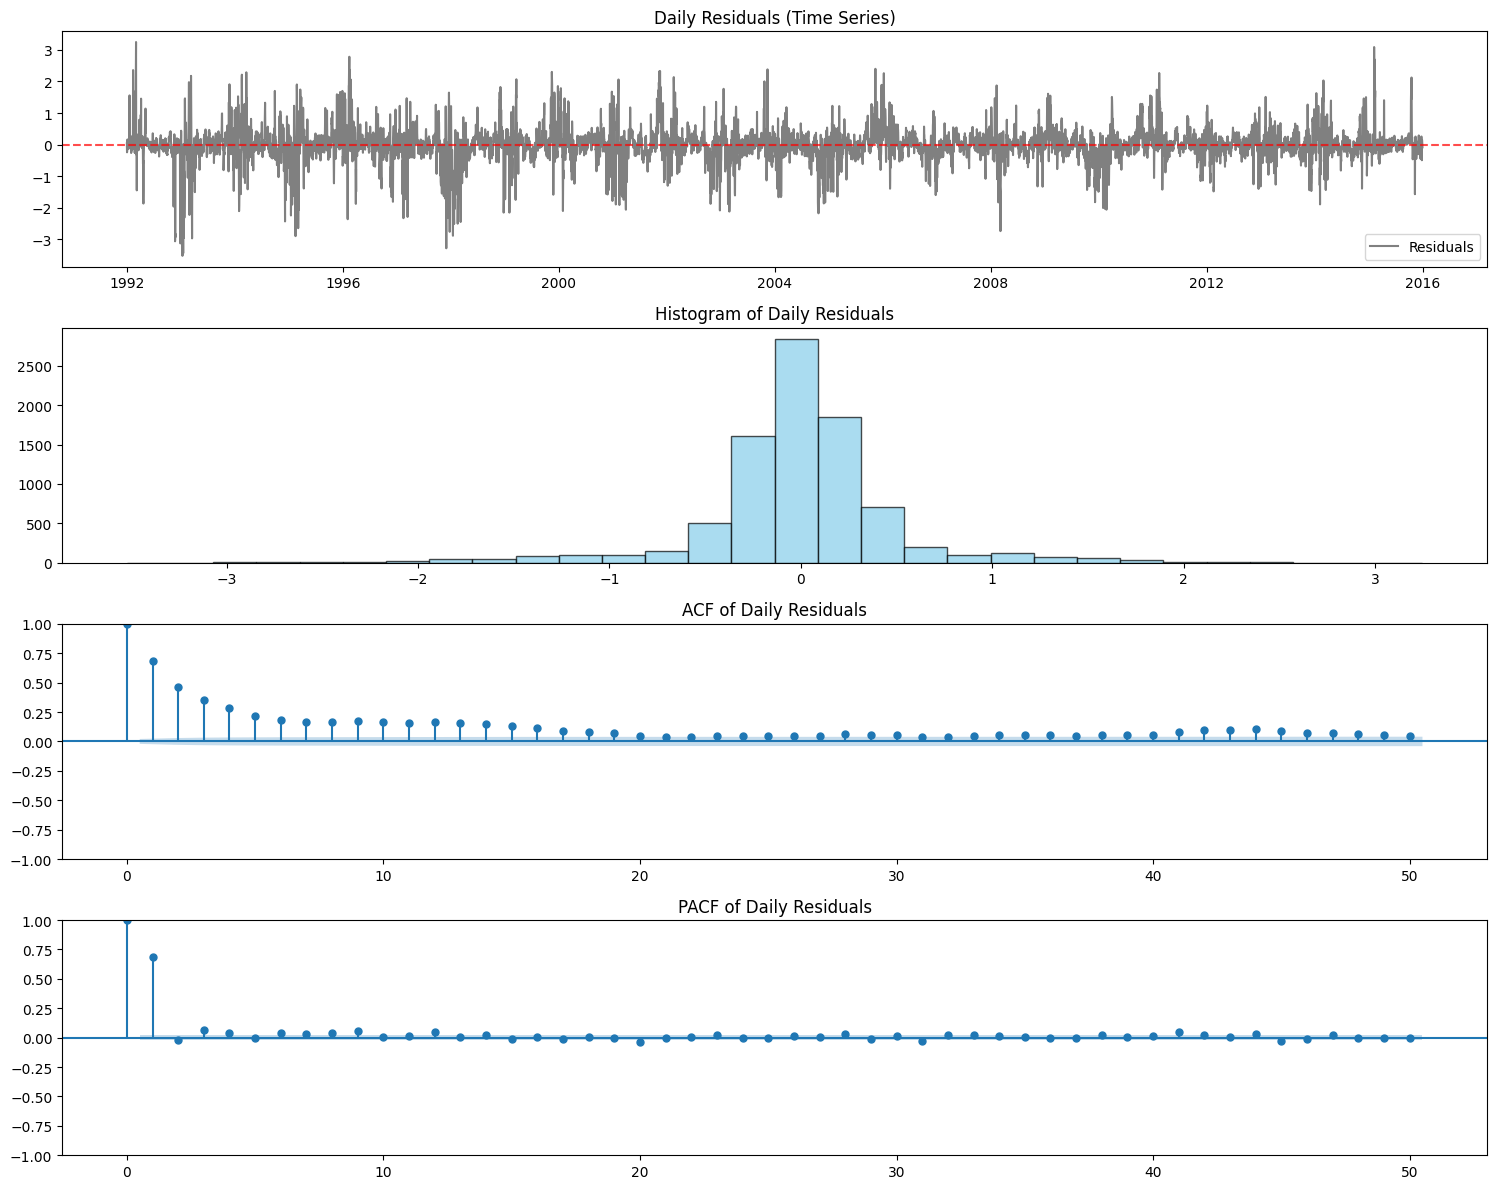

Daily residual analysis plot saved at: ./Abbildungen/daily_residual_analysis.png
Daily residuals saved at: ./Data_Waldbrand_Zeitreihen/daily_data_merged/daily_residuals.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# File paths
daily_file_path = r"./Data_Waldbrand_Zeitreihen/daily_fire_counts.csv"
monthly_file_path = r"./Data_Waldbrand_Zeitreihen/monthly_fire_counts.csv"

# Load the daily fire counts data
daily_data = pd.read_csv(daily_file_path)
daily_data.rename(columns={"DISCOVERY_DATE": "Date", "Daily Fire Counts": "Fire_Count"}, inplace=True)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)

# Log-transform the daily fire counts
daily_data['Log_Fire_Count'] = np.log1p(daily_data['Fire_Count'])

# Perform STL decomposition for log-transformed daily fire counts
stl_daily_log = STL(daily_data['Log_Fire_Count'], period=365, robust=True).fit()

# Extract residuals
daily_residuals = stl_daily_log.resid

# Residual Analysis for Daily Data
plt.figure(figsize=(15, 12))

# Residual time series
plt.subplot(411)
plt.plot(daily_residuals, label='Residuals', color='gray')
plt.axhline(0, linestyle='--', color='red', alpha=0.7)
plt.title('Daily Residuals (Time Series)')
plt.legend()

# Histogram of residuals
plt.subplot(412)
plt.hist(daily_residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Daily Residuals')

# ACF plot of residuals
plt.subplot(413)
plot_acf(daily_residuals.dropna(), lags=50, ax=plt.gca(), title='ACF of Daily Residuals')


# PACF plot of residuals
plt.subplot(414)
plot_pacf(daily_residuals.dropna(), lags=50, ax=plt.gca(), title='PACF of Daily Residuals')

# Save the plot to the 'Abbildungen' folder
daily_residuals_output_path = r"./Abbildungen/daily_residual_analysis.png"
plt.tight_layout()
plt.savefig(daily_residuals_output_path, dpi=300)
plt.show()

# Removed the undefined variable print statement
print(f"Daily residual analysis plot saved at: {daily_residuals_output_path}")
# Save the daily residuals to a CSV file
daily_residuals_output_csv_path = r"./Data_Waldbrand_Zeitreihen/daily_data_merged/daily_residuals.csv"
daily_residuals.to_csv(daily_residuals_output_csv_path, header=True)
print(f"Daily residuals saved at: {daily_residuals_output_csv_path}")


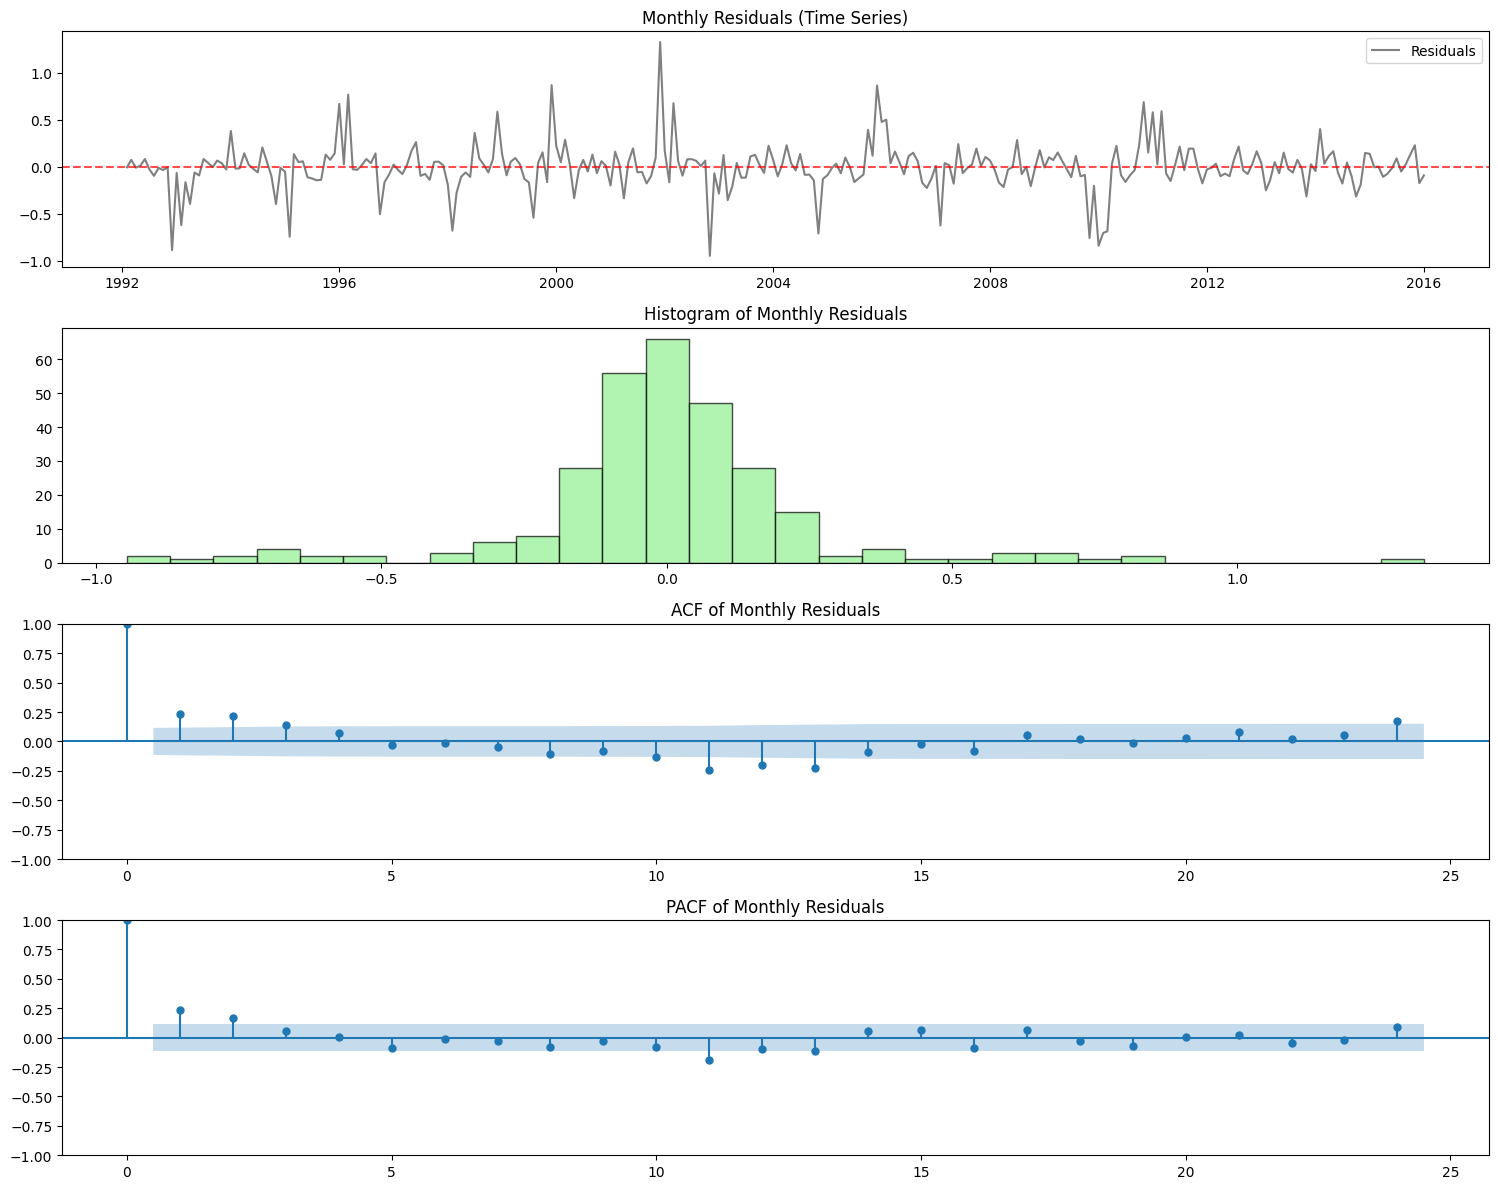

Monthly residual analysis plot saved at: ./Abbildungen/monthly_residual_analysis.png
Monthly residuals saved at: ./Data_Waldbrand_Zeitreihen/monthly_data_merged/monthly_residuals.csv


In [3]:

# Load the monthly fire counts data
monthly_data = pd.read_csv(monthly_file_path)
monthly_data.rename(columns={"DISCOVERY_DATE": "Date", "Monthly Fire Counts": "Fire_Count"}, inplace=True)
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data.set_index('Date', inplace=True)

# Log-transform the monthly fire counts
monthly_data['Log_Fire_Count'] = np.log1p(monthly_data['Fire_Count'])

# Perform STL decomposition for log-transformed monthly fire counts
stl_monthly_log = STL(monthly_data['Log_Fire_Count'], period=12, robust=True).fit()

# Extract residuals
monthly_residuals = stl_monthly_log.resid

# Residual Analysis for Monthly Data
plt.figure(figsize=(15, 12))

# Residual time series
plt.subplot(411)
plt.plot(monthly_residuals, label='Residuals', color='gray')
plt.axhline(0, linestyle='--', color='red', alpha=0.7)
plt.title('Monthly Residuals (Time Series)')
plt.legend()

# Histogram of residuals
plt.subplot(412)
plt.hist(monthly_residuals, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Monthly Residuals')

# ACF plot of residuals
plt.subplot(413)
plot_acf(monthly_residuals.dropna(), lags=24, ax=plt.gca(), title='ACF of Monthly Residuals')
# PACF plot of residuals

plt.subplot(414)
plot_pacf(monthly_residuals.dropna(), lags=24, ax=plt.gca(), title='PACF of Monthly Residuals')
# Save the plot to the 'Abbildungen' folder
monthly_residuals_output_path = r"./Abbildungen/monthly_residual_analysis.png"
plt.tight_layout()
plt.savefig(monthly_residuals_output_path, dpi=300)
plt.show()

print(f"Monthly residual analysis plot saved at: {monthly_residuals_output_path}")

# Save the monthly residuals to a CSV file
monthly_residuals_output_csv_path = r"./Data_Waldbrand_Zeitreihen/monthly_data_merged/monthly_residuals.csv"
monthly_residuals.to_csv(monthly_residuals_output_csv_path, header=True)
print(f"Monthly residuals saved at: {monthly_residuals_output_csv_path}")